# The Internet and Dating

[Project extensions are at the bottom of this file]

Cisco was founded by Sandy Lerner and Leonard Bosak because of love and the need to connect.

In 1984, Sandy and Leonard were dating while working in two separate buildings at Stanford University. They figured out how to connect their computers together over long distances so that they could communicate throughout the day. This gave birth to computer networks and the founding of Cisco.

In this project, you will investigate the influence of the Internet on how couples meet. Along the way, you will learn three Pro Tips for creating effective multi-line graphs.

### Loading the Data
The file `how-couples-met.csv` contains survey data on the ways couples met from the 1960s to the 2010s. Load the data and take a look.

Activity Goals:
- Load the couples data.
- Display the dataframe.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'how-couples-met.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('how-couples-met.csv')
df #display dataframe

,decade,college,at work,through friends,through family,online,restaurant,neighbors
0,1960.0,12.2,18.2,45.9,30.4,0.0,21.5,11.6
1,1970.0,16.4,23.9,48.9,28.6,0.0,25.0,8.9
2,1980.0,10.2,32.4,36.6,20.2,0.3,28.3,8.0
3,1990.0,10.5,30.7,35.9,18.5,3.2,26.2,7.7
4,2000.0,10.6,20.3,38.1,15.2,22.6,18.5,8.8
5,2010.0,6.7,15.5,28.9,10.0,42.2,14.0,4.3


The data captures seven of the common ways couples met, including at college or work, through friends or family, online, at a restaurant, or as neighbors.

We see the percentage of couples who reported that they met by each method, for each decade. In the 1960s, most couples met through friends or family. By the 2010s, meeting through family had dropped to only 10% of couples.

### Visualizing time series

A time series is a sequence of data points ordered by time. A great way to visualize a time series is to use a line graph. Let's create the plot directly from pandas. Run the code below.

<Axes: >

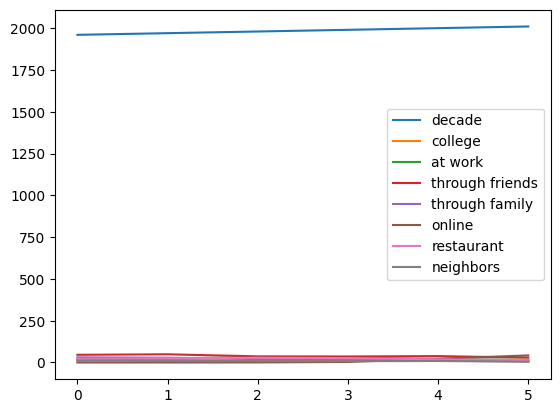

In [3]:
df.plot()

What went wrong here?

If the x column is not specified, the x-axis values are taken from the dataframe's index. If we set the `decade` column as the index, the graph will work as we want it to.

Activity Goals:
- Set `decade` column as index.
- Display dataframe.

In [4]:
df = df.set_index('decade')
df #display

,college,at work,through friends,through family,online,restaurant,neighbors
decade,,,,,,,
1960.0,12.2,18.2,45.9,30.4,0.0,21.5,11.6
1970.0,16.4,23.9,48.9,28.6,0.0,25.0,8.9
1980.0,10.2,32.4,36.6,20.2,0.3,28.3,8.0
1990.0,10.5,30.7,35.9,18.5,3.2,26.2,7.7
2000.0,10.6,20.3,38.1,15.2,22.6,18.5,8.8
2010.0,6.7,15.5,28.9,10.0,42.2,14.0,4.3


Now the index is the `decade` column.

Let's replot the data.

<Axes: xlabel='decade'>

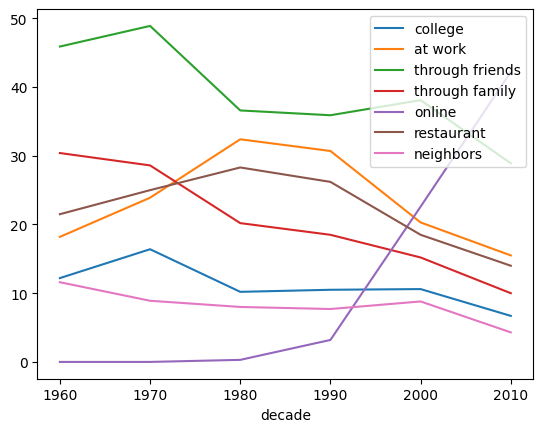

In [5]:
df.plot()

Not bad for one line of code!

The purple line, representing meeting online, shows a dramatic rise from 3% in the 1990s to 42% in the 2010s, becoming the dominant method that couples meet.

### Visual storytelling
A good visualization uses focus to help tell a story.

The big story in this graph is that meeting online has rapidly become the most popular way for couples to meet. How can we make this story stand out?

Let's create a new line graph, this time drawing attention to the line for meeting online. For colors we will use the the tab10 color palette supported by Matplotlib.

We will start by making the `online` line thicker and red (`C3`). We will also reduce the transparency of the other lines, making them dimmer.

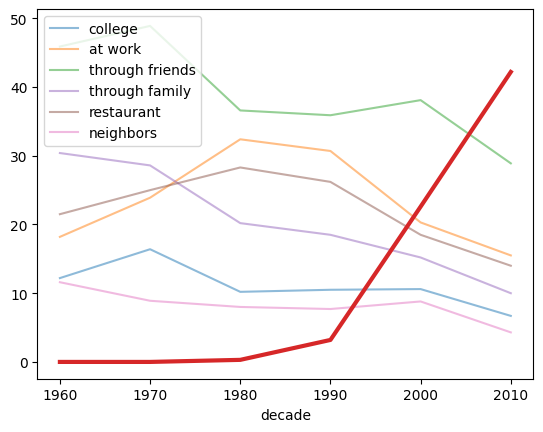

In [6]:
focus_column = 'online'
focus_color = 'C3' #red
back_columns = [
    'college', 'at work', 'through friends',
    'through family', 'restaurant', 'neighbors'
]
back_colors = ['C0', 'C1', 'C2',  'C4', 'C5', 'C6']
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.show()

Our graph now emphasizes that meeting online has become the most popular way for couples to meet. The story is more clear.

There are still improvements we can make to the graph, though, to make it look more polished and professional. Let's take a look at some Pro Tips.

# Pro Tip 1: Label the lines
Legends are included by default with this pandas method, but they aren't a best practice. A legend adds clutter and makes the reader work harder, needing to look back and forth between the lines and the legend to interpret the data.

Instead, you can directly label the lines onto your chart. Here is a helper function to label the lines for a list of column names.

In [7]:
def add_end_labels(df, x, column_names, alpha):
    for column_name in column_names:
        y = df[column_name].iloc[-1]
        offset_spacing = "  "
        label = offset_spacing + column_name
        plt.text(x, y, label, va="center", alpha=alpha)

Notice how we are using `plt.text( )` to add at the end of each line with an offset spacing. To learn more about the `text()` method, explore the documentation.

Let's label the lines with our helper function! Remember that the storytelling goal here is for the graph to emphasize that meeting online has become the most common way for couples to meet.

Activity Goals:
- Remove the legend.
- Label the background lines with a reduced opacity.
- Label the `online` line.

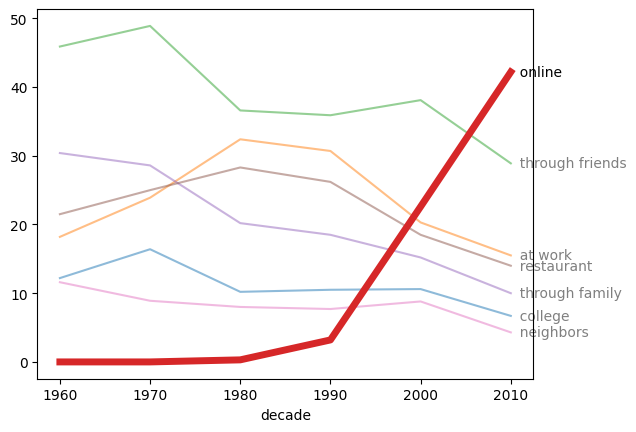

In [8]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=5)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)


It's getting better! We removed the legend and directly labeled each line. Next we'll improve the presentation of the axes.

### Pro Tip 2: Replace ticks and spines with faded grid lines

The default chart is trapped in bounding lines called spines. The spines can be hidden, to produce a cleaner graph.

Let's hide all the spines except for the bottom spine.

Activity Goal:
- Remove spines: left, top, right

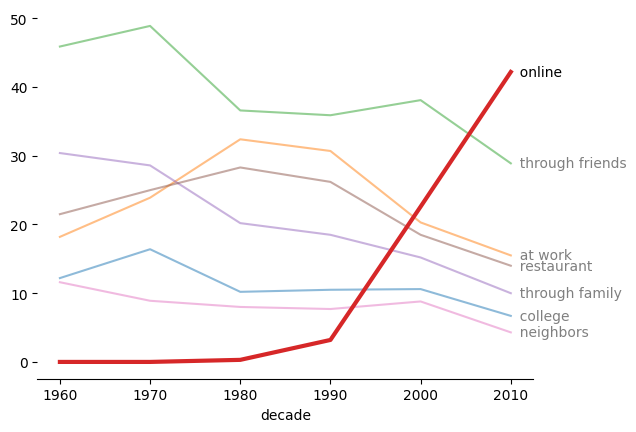

In [9]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)

ax = plt.gca()
ax.spines[['left', 'top', 'right']].set_visible(False)


Next let's replace the floating tick marks on the y axis with horizontal grid lines. We can also fade the gridlines by reducing the alpha to 50%.

Activity Goal:
- Configure horizontal grid lines

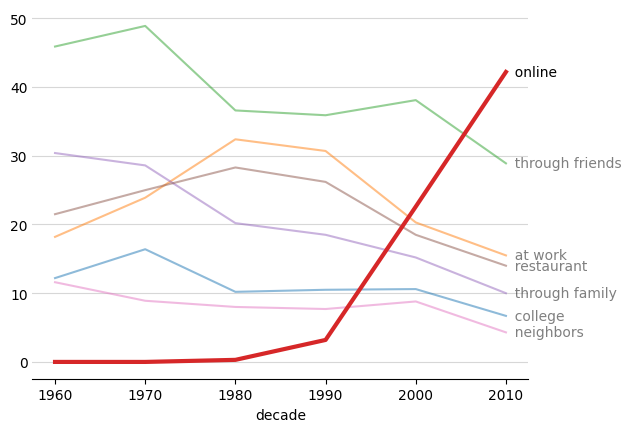

In [10]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)

ax = plt.gca()
ax.spines[['left', 'top', 'right']].set_visible(False)
ax.tick_params(axis='y', length=0)
plt.grid(axis='y', alpha=0.5)

Here is a python function we can use to apply Pro Tip 2 to any line chart:

In [11]:
def clean_axes( ):
    ax = plt.gca()
    ax.spines[['left', 'top', 'right']].set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.grid(axis='y', alpha=0.5)

With this Pro Tip we have swapped out "ticks and spines" for "faded grid lines". This creates a less cluttered presentation of the data. Horizontal grid lines also make it easier to estimate the percentages of couples who met by each method in each decade.

### Pro Tip 3: Minimize rotated text

Let's improve the graph by adding labels to the x and y axes. Without labels, it is not clear what is being represented or what the units are.

We want to avoid rotated text when we can. Vertical or otherwise rotated text is hard to read. Here we will explore a clever way to avoid adding a vertical y-axis label ('percent').

Activity Goal:
- Label axes avoiding rotated text.

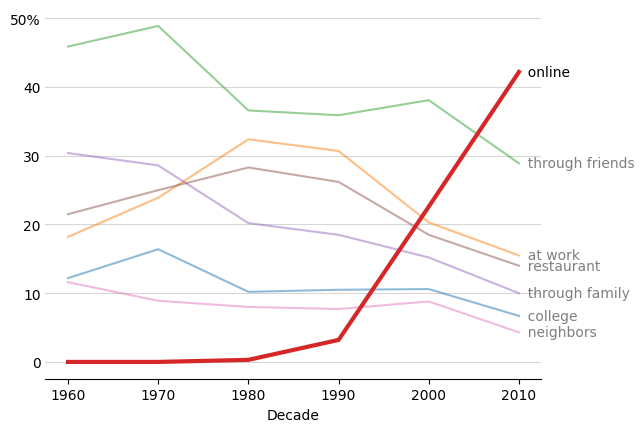

In [12]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)
clean_axes()

y_ticks = [0, 10, 20, 30, 40, 50]
y_tick_labels = ['0', '10', '20', '30', '40', '50%']
plt.yticks(y_ticks, y_tick_labels)
plt.xlabel('Decade')
plt.show()

Here is the code that applies these simplified axes labels:

In [13]:
def add_axes_labels( ):
    y_ticks = [0, 10, 20, 30, 40, 50]
    y_tick_labels = ['0', '10', '20', '30', '40', '50%']
    plt.yticks(y_ticks, y_tick_labels)
    plt.xlabel('Decade')

With Pro Tip 3 we added polish by labeling the axes with horizontal text.

### Pro Tip Recap

There you have it! We used focus and three Pro Tips to create a compelling line graph:

- Pro Tip 1: Label the lines directly.
- Pro Tip 2: Swap out the ticks and spines for faded grid lines.
- Pro Tip 3: Minimize rotated text.

## Project extensions

Below are a few ideas for extensions: 

1. Create a horizontal bar plot for a specific decade, displaying the proportion of people who met through each method (e.g., online, through friends).

2. Create a set of subplots featuring horizontal bar plots for two different decades of your choosing, with each subplot showing the proportion of people who met through each method.

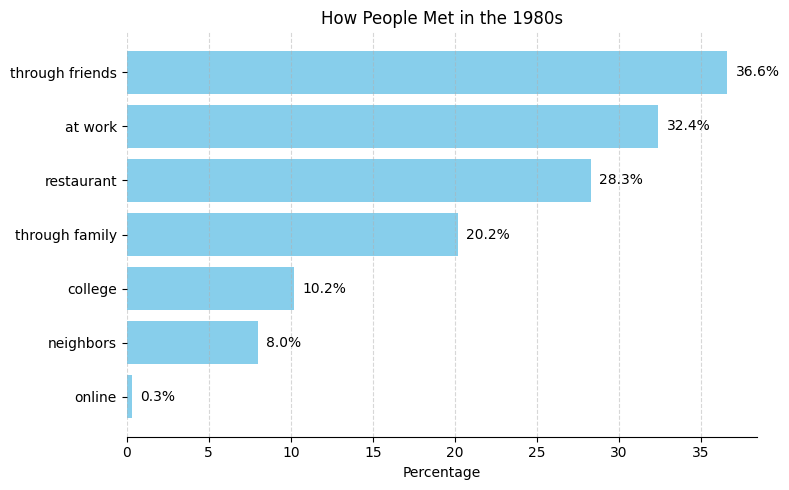

In [17]:
# YOUR CODE HERE (add new cells as needed)

import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("how-couples-met.csv")  # replace with actual file path if needed

# Melt for easier plotting
df_melted = df.melt(id_vars="decade", var_name="method", value_name="percentage")


# Plot for a Specific Decade
# Melt for easier plotting
df_melted = df.melt(id_vars="decade", var_name="method", value_name="percentage")

# Filter for a specific decade (e.g., 1980)
df_1980 = df_melted[df_melted["decade"] == 1980.0].sort_values("percentage")

plt.figure(figsize=(8, 5))
bars = plt.barh(df_1980["method"], df_1980["percentage"], color="skyblue")

# Add text labels directly on the bars (Pro Tip 1)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}%", va="center")

# Polish the plot
plt.title("How People Met in the 1980s")
plt.xlabel("Percentage")
plt.gca().spines[['top', 'right', 'left']].set_visible(False)  # Pro Tip 2
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

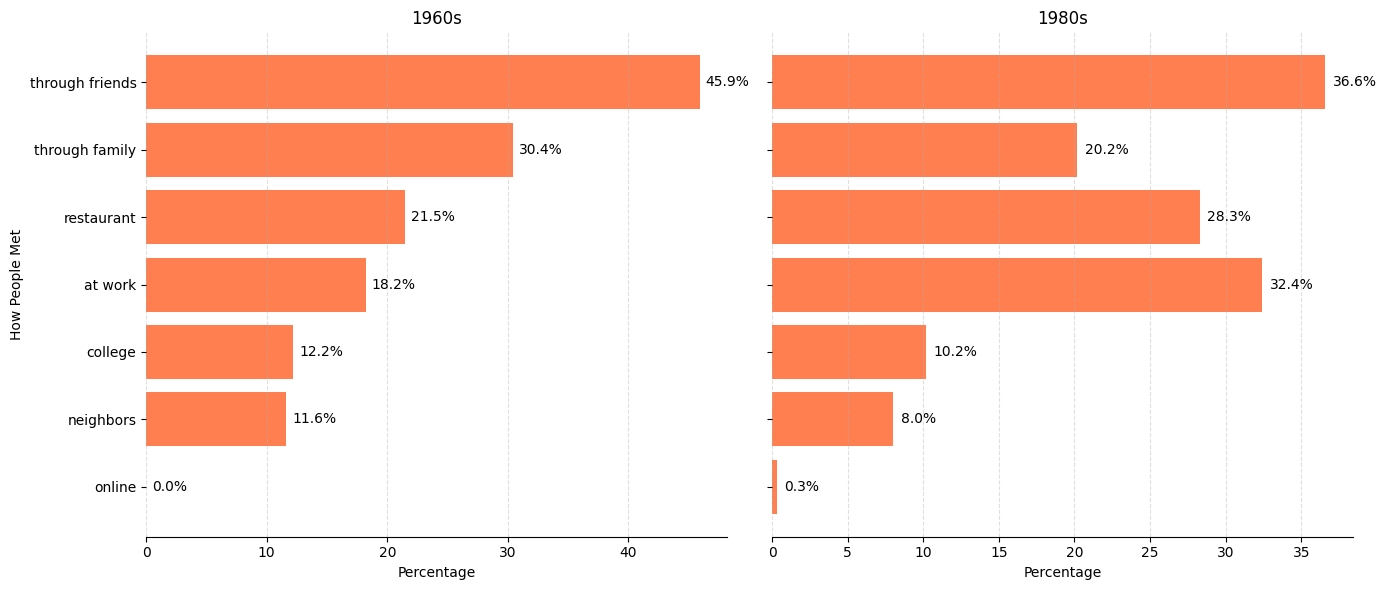

In [18]:
# Subplots for Two Decades

# Choose two decades to compare
decades_to_plot = [1960.0, 1980.0]
df_subset = df_melted[df_melted["decade"].isin(decades_to_plot)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, decade in zip(axes, decades_to_plot):
    decade_data = df_subset[df_subset["decade"] == decade].sort_values("percentage")
    bars = ax.barh(decade_data["method"], decade_data["percentage"], color="coral")

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f"{width:.1f}%", va="center")

    ax.set_title(f"{int(decade)}s")
    ax.set_xlabel("Percentage")
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.4)

axes[0].set_ylabel("How People Met")
plt.tight_layout()
plt.show()
